## Лабораторная №7


In [1]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
class TextProcessor:
    def __init__(self, stop_words):
        self.stop_words = stop_words

    def clean_text(self, text):
        text = re.sub(r'[^а-яА-ЯёЁa-zA-Z0-9\s]', '', text)
        text = text.lower()
        return text

    def remove_stop_words(self, text):
        words = text.split()
        filtered_words = [word for word in words if word not in self.stop_words]
        return ' '.join(filtered_words)

    def process_texts(self, texts):
        cleaned_texts = [self.clean_text(text) for text in texts]
        return [self.remove_stop_words(text) for text in cleaned_texts]


In [3]:
class BagOfWords:
    def __init__(self, reviews):
        self.reviews = reviews

    def get_reviews(self):
        return self.reviews


In [4]:
class SentimentModel:
    def __init__(self, ngram_range=(1, 1)):
        self.vectorizer = TfidfVectorizer(ngram_range=ngram_range)
        self.model = LinearRegression()
        self.pipeline = Pipeline([
            ('vectorizer', self.vectorizer),
            ('regressor', self.model)
        ])

    def fit(self, texts, targets):
        self.pipeline.fit(texts, targets)

    def analyze_coefficients(self):
        feature_names = self.vectorizer.get_feature_names_out()
        coefficients = self.model.coef_
        coeff_dict = {feature: coef for feature, coef in zip(feature_names, coefficients)}
        sorted_coeff = sorted(coeff_dict.items(), key=lambda x: abs(x[1]), reverse=True)
        return sorted_coeff


In [5]:
class TextAnalysisPipeline:
    def __init__(self, reviews, stop_words):
        self.reviews = reviews
        self.stop_words = stop_words
        self.text_processor = TextProcessor(stop_words)
        self.bag_of_words = BagOfWords(reviews)
        self.model = None

    def preprocess(self):
        self.processed_reviews = self.text_processor.process_texts(self.bag_of_words.get_reviews())

    def train_model(self, targets, ngram_range=(1, 1)):
        self.model = SentimentModel(ngram_range=ngram_range)
        self.model.fit(self.processed_reviews, targets)

    def get_coefficients(self):
        if self.model:
            return self.model.analyze_coefficients()
        else:
            raise ValueError("Model is not trained yet.")



In [6]:
reviews = [
    "Преподаватели очень квалифицированные и всегда готовы помочь.",
    "Старые здания, но хорошее оборудование в аудиториях.",
    "Хорошая библиотека с большим количеством учебников.",
    "Неудобное расписание занятий, часто накладываются пары.",
    "Дружелюбная атмосфера среди студентов и сотрудников.",
    "Много возможностей для научной работы и исследований.",
    "Сложная бюрократия, оформление документов занимает много времени.",
    "Университет находится в центре города, очень удобно.",
    "Плохая столовая, еда невкусная и дорогая.",
    "Высокий уровень подготовки по многим специальностям.",
    "Много внеучебных мероприятий и студенческих клубов.",
    "Парковка возле университета почти всегда занята.",
    "Некоторые преподаватели необъективно оценивают студентов.",
    "Современные технологии используются в обучении.",
    "Трудно добираться до кампуса на общественном транспорте.",
    "Хорошая поддержка студентов, много стипендий.",
    "Маленькие аудитории, иногда не хватает мест.",
    "Прекрасные возможности для стажировок за границей.",
    "Некоторые корпуса нуждаются в ремонте.",
    "Программа обучения очень насыщенная и интересная.",
    "Доступ к онлайн-курсам и дополнительным ресурсам.",
    "Медленный Wi-Fi в общежитиях и кампусах."
]


ratings = [5, 4, 5, 2, 4, 5, 2, 5, 1, 5, 5, 2, 3, 5, 2, 5, 3, 5, 2, 5, 5, 2]


stop_words = ["и", "но", "с", "в", "на", "что", "не"]

In [7]:
def plot_word_frequencies(processed_texts):
    all_words = " ".join(processed_texts).split()
    word_counts = Counter(all_words).most_common(10)
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words, palette="viridis")
    plt.title("Топ-10 самых частых слов")
    plt.xlabel("Частота")
    plt.ylabel("Слова")
    plt.show()


def plot_model_coefficients(coefficients, top_n=10):
    top_coefficients = coefficients[:top_n]
    words, coefs = zip(*top_coefficients)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=coefs, y=words, palette="coolwarm")
    plt.title(f"Топ-{top_n} значимых слов (коэффициенты модели)")
    plt.xlabel("Коэффициенты")
    plt.ylabel("Слова / N-граммы")
    plt.show()


def plot_ratings_distribution(ratings):
    plt.figure(figsize=(8, 6))
    sns.histplot(ratings, bins=5, kde=False, color="skyblue")
    plt.title("Распределение оценок")
    plt.xlabel("Оценка")
    plt.ylabel("Количество")
    plt.show()


In [8]:
pipeline = TextAnalysisPipeline(reviews, stop_words)
pipeline.preprocess()
pipeline.train_model(ratings, ngram_range=(1, 2))
coefficients = pipeline.get_coefficients()

Коэффициенты модели (самые значимые слова):
очень: 0.941
дорогая: -0.892
еда: -0.892
еда невкусная: -0.892
невкусная: -0.892
невкусная дорогая: -0.892
плохая: -0.892
плохая столовая: -0.892
столовая: -0.892
столовая еда: -0.892


C:\Users\alber\AppData\Local\Temp\ipykernel_16172\497399708.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


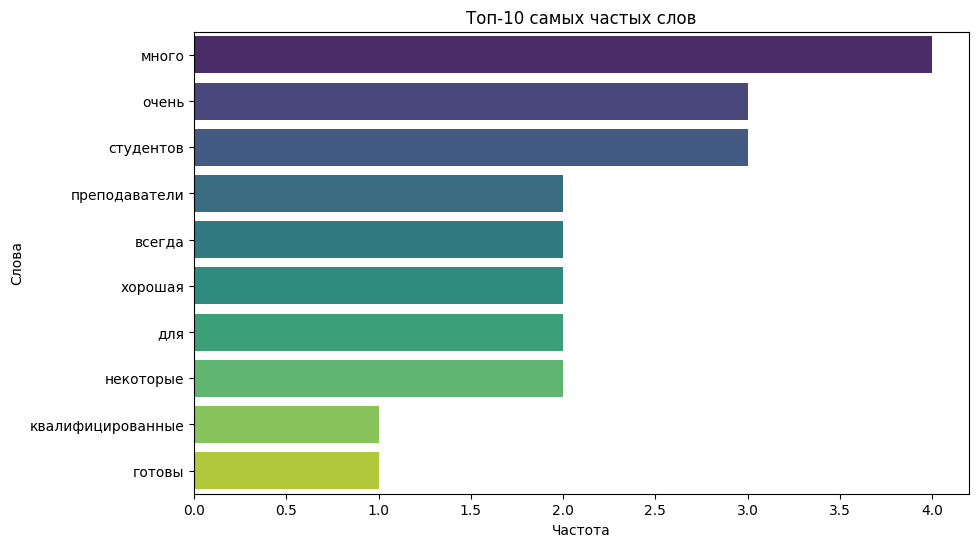

C:\Users\alber\AppData\Local\Temp\ipykernel_16172\497399708.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs, y=words, palette="coolwarm")


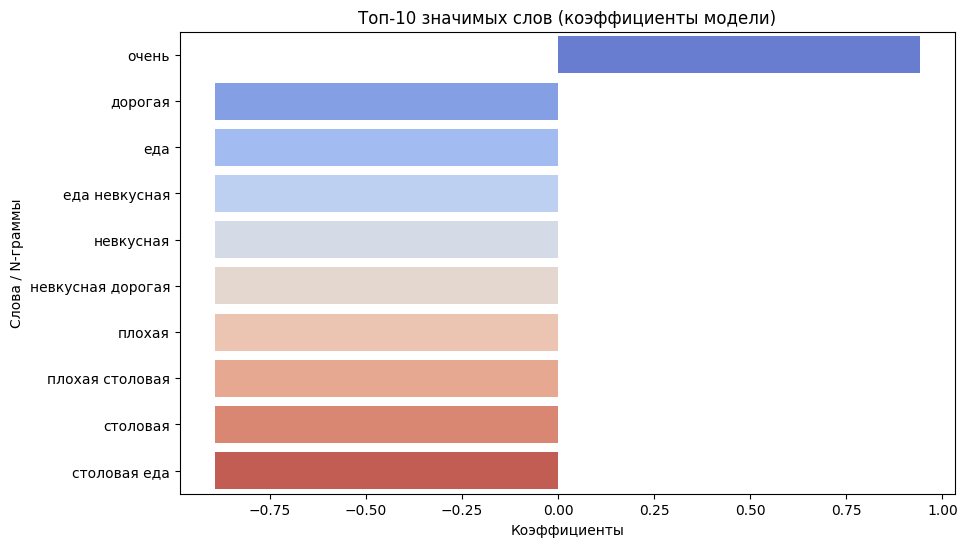

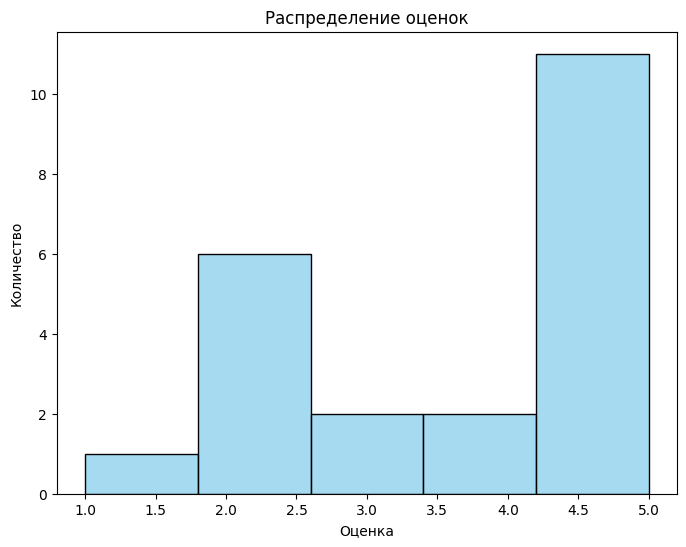

In [9]:
print("Коэффициенты модели (самые значимые слова):")
for word, coef in coefficients[:10]:
    print(f"{word}: {coef:.3f}")


plot_word_frequencies(pipeline.processed_reviews)
plot_model_coefficients(coefficients, top_n=10)
plot_ratings_distribution(ratings)